# 1、写出。

## 2、使用 Keras 实现 MNIST 数据集手写数字识别

In [2]:
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


1.1.0
2.1.2


In [3]:
import numpy as np
import pandas as pd
# 转换成独热编码的时候使用
from keras.utils import np_utils

# 设置随机数种子，即多次运行出现同样的随机数
np.random.seed(10)

+ 下载手写数字数据集，这份数据集已经分好了训练数据集与测试数据集，所以不用手动划分。

In [10]:
from keras.datasets import mnist

(X_train_image, y_train_label), (X_test_image, y_test_label) = mnist.load_data()

print(len(X_train_image), len(X_test_image))
print(len(y_train_label), len(y_test_label))

11493376/11490434 [==============================] - 92s 8us/step
60000 10000
60000 10000


+ 下载好的数据存放在宿主目录下的 `.keras/datasets/` 文件夹里。

In [11]:
# 看看图片数据是什么样子
X_train_image.shape, X_test_image.shape, y_train_label.shape, y_test_label.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

+ 使用 matplotlib 的 imshow 方法看看手写数字是什么样子。

In [12]:
import matplotlib.pyplot as plt


def plot_image(image):
    figure = plt.gcf()
    figure.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

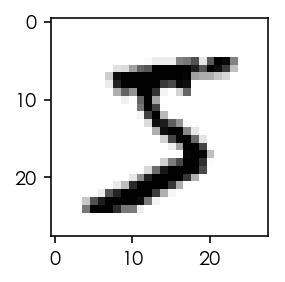

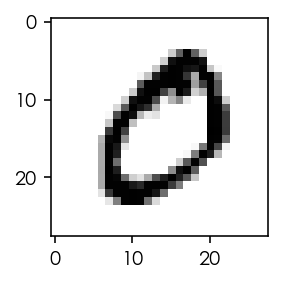

(None, None)

In [13]:
plot_image(X_train_image[0]), plot_image(X_train_image[1])

In [14]:
y_train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

+ 把图片和标签连起来看一下，加深对这个数据集的认识。

In [15]:
def plot_images_labels_predict(images, labels, prediction, num=10):

    # 设置显示图形的大小
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25

    for i in range(num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[i], cmap='binary')
        title = "label=" + str(labels[i])

        if len(prediction) > 0:
            title += ",prediction" + str(prediction[i])

        ax.set_title(title, fontsize=14)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

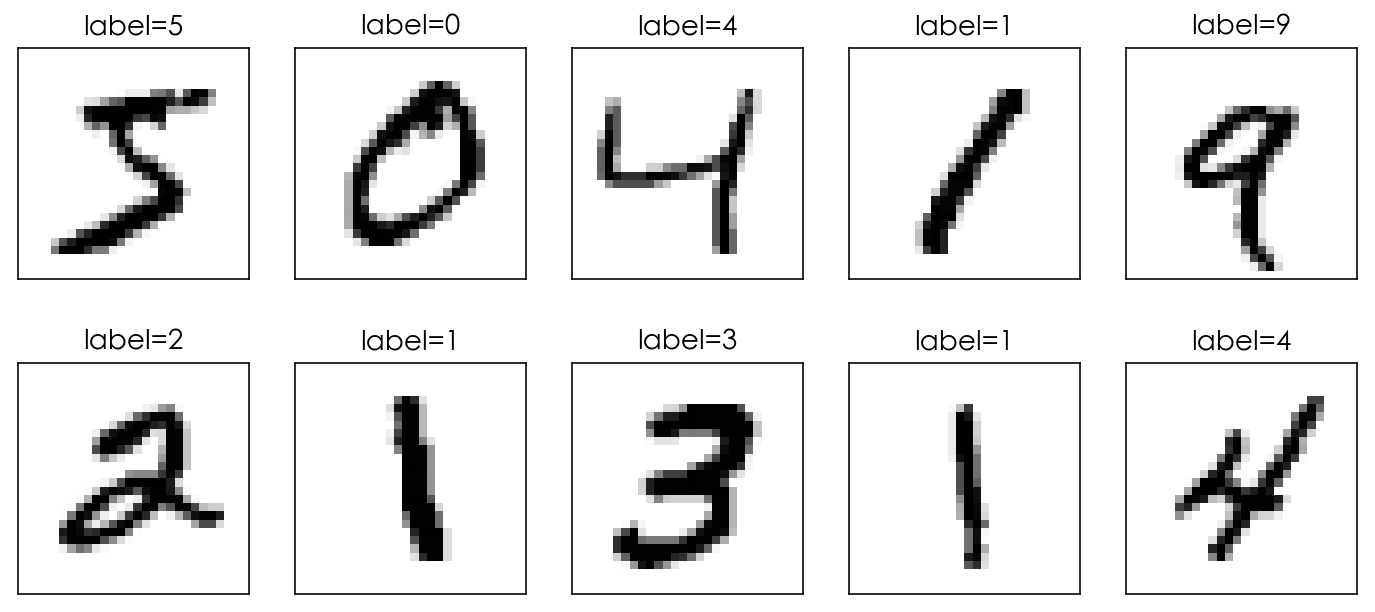

In [16]:
# 看训练数据的前 10 个
plot_images_labels_predict(X_train_image, y_train_label, [], 10)

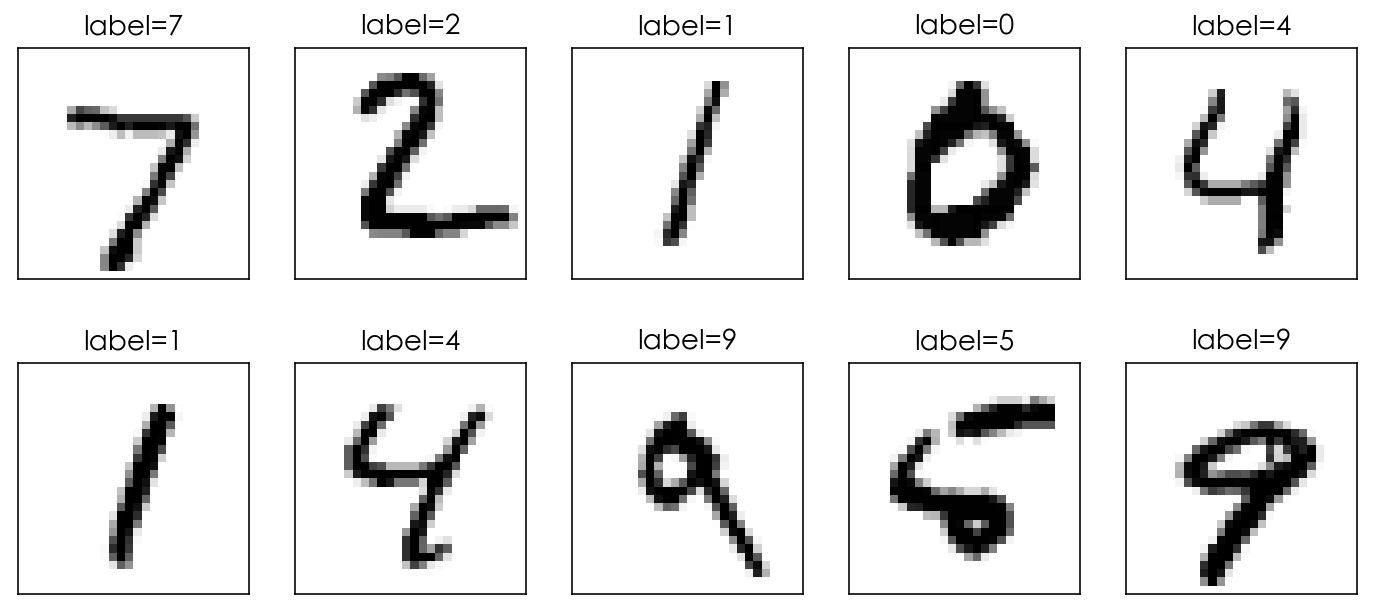

In [17]:
# 看测试数据的前 10 个
plot_images_labels_predict(X_test_image, y_test_label, [], 10)

+ 对 feature 特征预处理

这里送入全连接神经网络，因此要转换为一维向量。如果是送入卷积神经网络，就不用拉平。注意，这里要将特征转化为 float32 类型。

In [18]:
X_Train = X_train_image.reshape(-1, 28 * 28).astype('float32')
X_Test = X_test_image.reshape(-1, 28 * 28).astype('float32')

In [19]:
X_Train.shape, X_Test.shape

((60000, 784), (10000, 784))

+ 标准化，这一步是很重要的，对于图像信息经常要做数据的标准化和归一化。

In [20]:
X_Train_normalize = X_Train / 255
X_Test_normalize = X_Test / 255

+ target  处理成独热编码

In [21]:
# 看看标签是啥样子
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [23]:
# 因为神经网络的输出是一个数值，手写数字识别是一个分类问题，因此要将标签处理成独热编码
y_train_one_hot = np_utils.to_categorical(y_train_label)
y_test_one_hot = np_utils.to_categorical(y_test_label)
print(y_train_label.shape, y_train_one_hot.shape)
print(y_test_label.shape, y_test_one_hot.shape)

(60000,) (60000, 10)
(10000,) (10000, 10)


+ 使用多层全连接神经网络

In [25]:
from keras.models import Sequential
from keras.layers import Dense

# 建立一个线性堆叠模型，后续，我们只要使用 model.add() 方法将各个神经网络层加入模型就可以了
model = Sequential()

### 建立“输入层”与“隐藏层”（这里“输入层”与“隐藏层”是一起建立的）

+ kernel_initializer 表示：使用正态分布 normal distribution 的随机数来初始化 weight 和 bias
+ activation 表示：定义激活函数，这里是 relu 激活函数

In [26]:
# units=256 表示隐藏层设置 256 个神经元
# input_dim 输入层的神经元个数为 784
model.add(Dense(units=256, input_dim=784,
                kernel_initializer='normal', activation='relu'))

### 建立输出层

+ 这里使用 softmax 激活函数进行转换，softmax 可以将神经元的输出转换为预测每一个数字的概率。

In [27]:
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

### 查看模型的摘要

+ “输入层”与“隐藏层”是一起建立的，所以没有显示“输入层”

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [29]:
(784 + 1) * 256, (256 + 1) * 10, 200960 + 2570

(200960, 2570, 203530)

### 解读参数的个数

$200960 = (784 + 1) \times 256$

$2570 = (256 + 1) \times 10$

Trainable params: 203,530 

**注意：计算偏置的时候，偏置归入上一层。**

In [30]:
784 * 256 + 256, (784 + 1) * 256 

(200960, 200960)

In [31]:
256 * 10 + 10, (256 + 1) * 10

(2570, 2570)

In [32]:
200960 + 2570

203530

## 定义训练方式

In [33]:
# categorical_crossentropy 交叉熵损失函数
# 使用 adam 优化器，使得收敛更快，可以理解成是随机梯度下降法的优化算法，即也是一种通过迭代搜索最优值的方法
# 评估模型的方式是准确率
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

+ verbose=2 显示训练过程
+ epochs=10 执行了 10 个训练周期
+ batch_size=200 每一个批次输入 200 个数据

In [34]:
train_history = model.fit(x=X_Train_normalize, y=y_train_one_hot,
                          validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4378 - acc: 0.8829 - val_loss: 0.2181 - val_acc: 0.9408
Epoch 2/10
 - 1s - loss: 0.1910 - acc: 0.9456 - val_loss: 0.1554 - val_acc: 0.9557
Epoch 3/10
 - 1s - loss: 0.1354 - acc: 0.9617 - val_loss: 0.1259 - val_acc: 0.9648
Epoch 4/10
 - 1s - loss: 0.1025 - acc: 0.9704 - val_loss: 0.1118 - val_acc: 0.9682
Epoch 5/10
 - 1s - loss: 0.0809 - acc: 0.9774 - val_loss: 0.0981 - val_acc: 0.9708
Epoch 6/10
 - 1s - loss: 0.0658 - acc: 0.9819 - val_loss: 0.0935 - val_acc: 0.9719
Epoch 7/10
 - 1s - loss: 0.0543 - acc: 0.9851 - val_loss: 0.0913 - val_acc: 0.9735
Epoch 8/10
 - 1s - loss: 0.0458 - acc: 0.9876 - val_loss: 0.0828 - val_acc: 0.9766
Epoch 9/10
 - 1s - loss: 0.0378 - acc: 0.9903 - val_loss: 0.0825 - val_acc: 0.9758
Epoch 10/10
 - 1s - loss: 0.0315 - acc: 0.9917 - val_loss: 0.0806 - val_acc: 0.9760


+ 将训练结果的数据绘图看一看

In [35]:
import matplotlib.pyplot as plt


def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

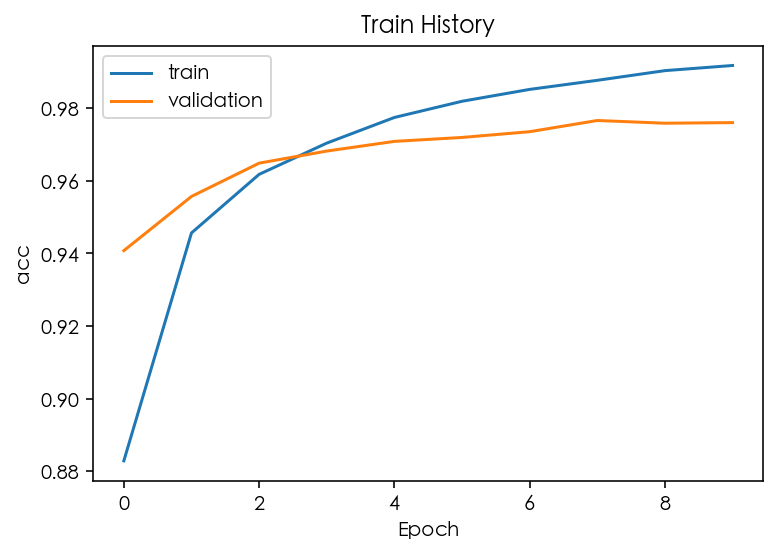

In [36]:
# val_acc 表示验证集的准确率，acc 就是 accuracy 的缩写
show_train_history(train_history, 'acc', 'val_acc')

+ 训练数据集的准确率比验证数据集高一些，不是严重的过拟合，所以效果还是蛮不错的。

### 用测试数据评估模型的准确率

In [38]:
# 这个方法用于评估模型的准确率
scores = model.evaluate(X_Test_normalize, y_test_one_hot)
scores

10000/10000 [==============================] - 0s 30us/step


[0.07555244616139681, 0.9759]

In [39]:
scores[1]

0.9759

+ 在测试数据集上的效果还不错。

+ 进行预测

In [40]:
prediction = model.predict_classes(X_Test_normalize)
prediction

array([7, 2, 1, ..., 4, 5, 6])

+ 再看看神经网络预测的结果和标签

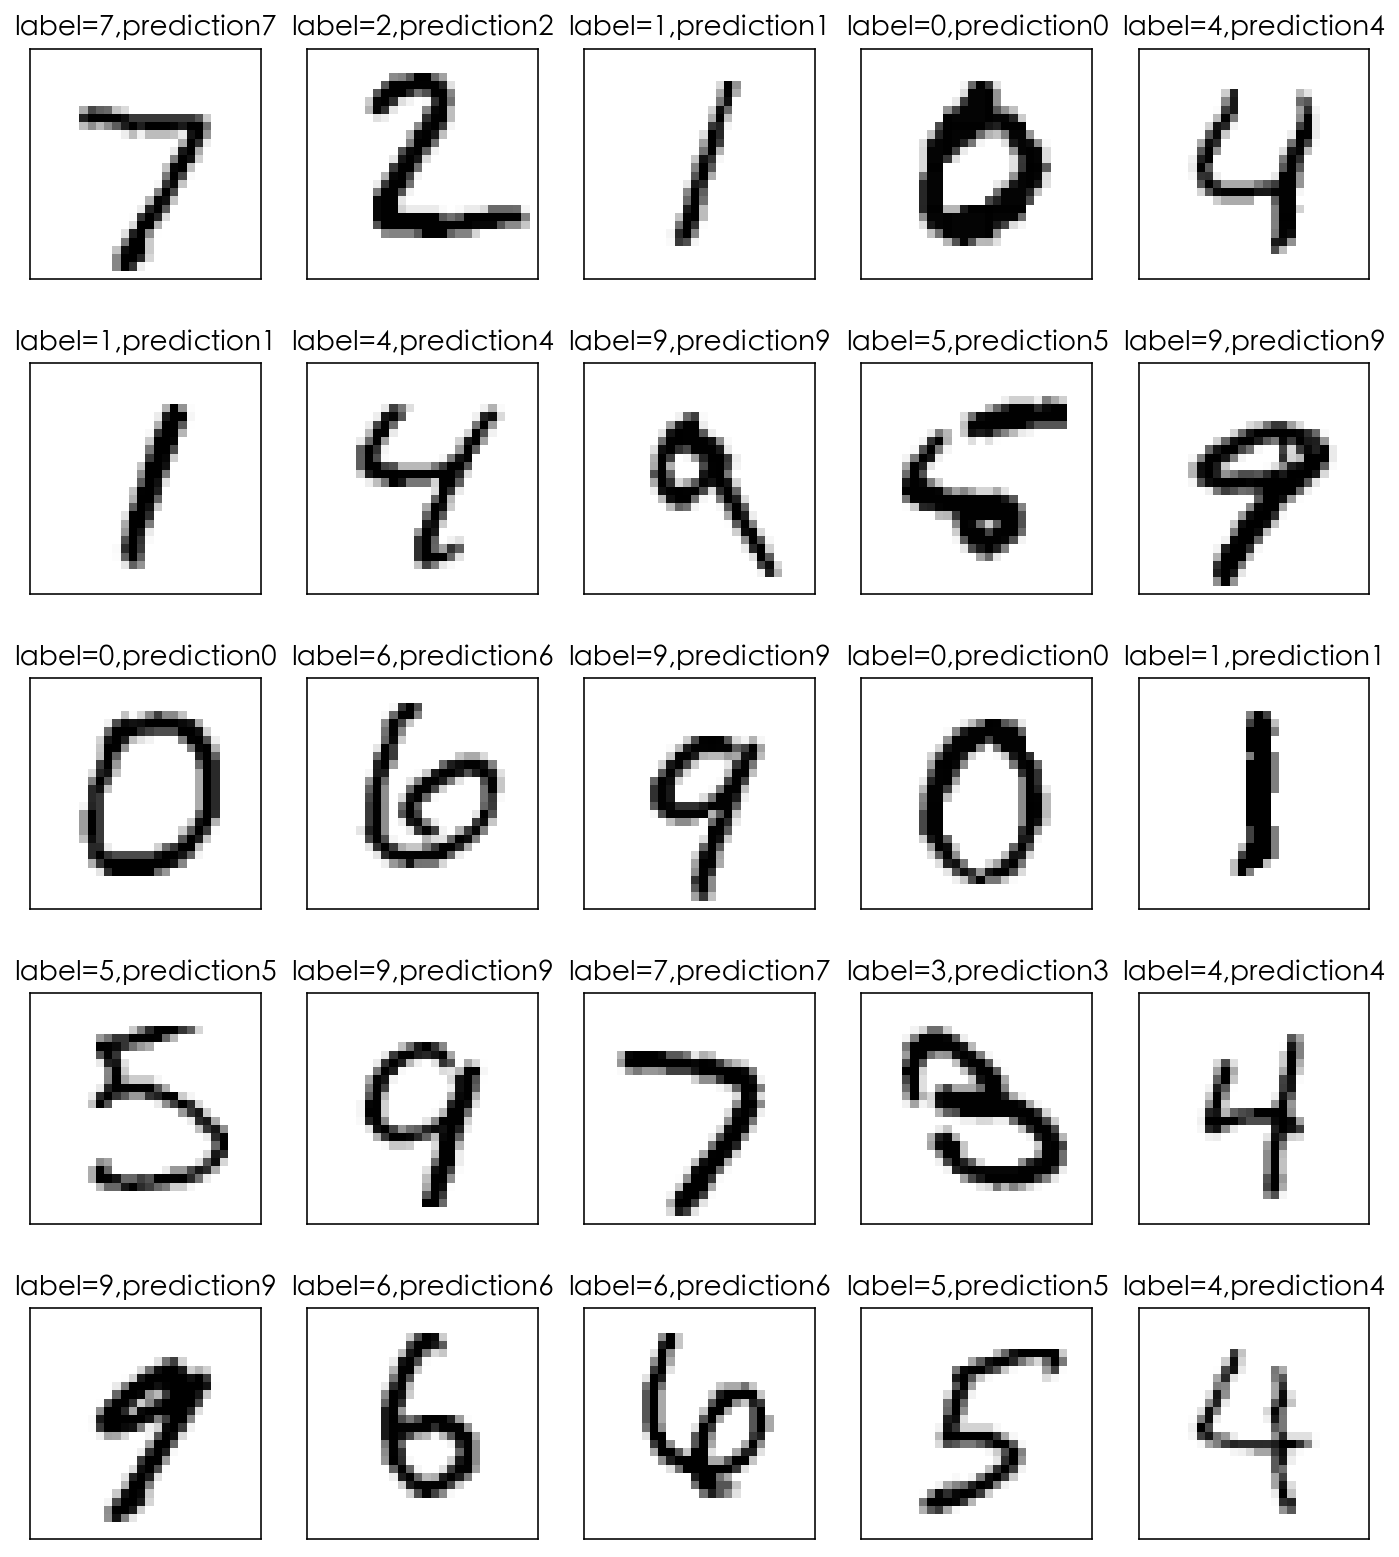

In [41]:
plot_images_labels_predict(X_test_image, y_test_label, prediction, 25)

+ 可以看到，绝大多数都预测正确了。

### 显示混淆矩阵

+ 使用 `pd.crosstab` 建立混淆矩阵

In [42]:
import pandas as pd

pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1009,0,1,0,2,5,9,1
3,0,0,5,988,0,3,0,4,6,4
4,1,0,5,1,963,0,2,0,3,7
5,2,0,0,12,1,859,7,1,8,2
6,5,3,3,1,4,3,937,0,2,0
7,0,5,13,6,1,0,0,989,6,8
8,5,0,3,5,3,2,1,2,952,1


+ 主对角线上的数字（预测对了的）占绝大多数，非主对角线上的元素（预测错了的）占少数。

我们观察到，这个矩阵中比较大的数值有 13 、 14 ，再看看它们对应的行和列。7 和 2 ， 9 和 4 ，它们的确“形似”，因此预测错误也在情理之中。